# IMPORTING IMPORTANT LIBRARIES

In [103]:
import numpy as np
# pandas for dataframe
import pandas as pd
#Matplotlib for visualization
import matplotlib.pyplot as plt
#display the plot in notebook
%matplotlib inline
#Visualisation
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
#tain and test 
from sklearn.model_selection import train_test_split
#display accuracy score
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,classification_report
#model building
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

# Data Preperation

# Importing The Titanic-Data 

In [104]:
titanic=pd.read_csv("D://machine learning 2//train.csv")


# Checking Wether The Data is Import

In [105]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# Checking Important Key Features

In [106]:
titanic.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Checking Shape of the Data(Row and Coloumn)

In [107]:
titanic.shape

(891, 12)

# Checking Data Types 

In [108]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Checking the min,max,mean etc of the dataset

In [109]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Changing All Coloumn Name into Small Letter

In [110]:
titanic.columns=map(str.lower,titanic.columns)#to make all the column name into small letter


# Checking Whether All The Coloumn Name Are in Small Letters

In [111]:
titanic.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Using Groupby to Check The Every Coloumn Detail

In [112]:
titanic.groupby("survived").size()

survived
0    549
1    342
dtype: int64

In [113]:
titanic.groupby("name").size()

name
Abbing, Mr. Anthony                      1
Abbott, Mr. Rossmore Edward              1
Abbott, Mrs. Stanton (Rosa Hunt)         1
Abelson, Mr. Samuel                      1
Abelson, Mrs. Samuel (Hannah Wizosky)    1
                                        ..
de Mulder, Mr. Theodore                  1
de Pelsmaeker, Mr. Alfons                1
del Carlo, Mr. Sebastiano                1
van Billiard, Mr. Austin Blyler          1
van Melkebeke, Mr. Philemon              1
Length: 891, dtype: int64

In [114]:
titanic.groupby("pclass").size()

pclass
1    216
2    184
3    491
dtype: int64

In [115]:
titanic.groupby("age").size()

age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Length: 88, dtype: int64

In [116]:
titanic.groupby("parch").size()

parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [117]:
titanic.groupby("sibsp").size()

sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

In [118]:
titanic.groupby("pclass").size()

pclass
1    216
2    184
3    491
dtype: int64

In [119]:
titanic.groupby("ticket").size()

ticket
110152         3
110413         3
110465         2
110564         1
110813         1
              ..
W./C. 6608     4
W./C. 6609     1
W.E.P. 5734    1
W/C 14208      1
WE/P 5735      2
Length: 681, dtype: int64

In [120]:
titanic.groupby("fare").size()

fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Length: 248, dtype: int64

In [121]:
titanic.groupby("cabin").size()

cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

In [122]:
titanic.groupby("embarked").size()

embarked
C    168
Q     77
S    644
dtype: int64

In [123]:
titanic.groupby("sex").size()

sex
female    314
male      577
dtype: int64

# Changing The Column Detail Into 0 and 1 (0 For Female and 1 For Male)

In [124]:
titanic["sex"]=[0 if x=="female"else 1 for x in titanic.sex]

# Checking The Null in DataSet

In [125]:
titanic.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

# Replacing The Null Value

In [126]:
titanic["embarked"].replace(np.nan,"C",inplace=True)

# Changing String Data into Integer

In [127]:
emb={"C":0,"Q":1,"S":2}
titanic.embarked=[emb[item]for item in titanic.embarked]

# Checking Wether The sex Coloumn Data Changed into Integer

In [128]:
titanic.head(2)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0


# Again Checking The Data Having Null Value or Not


In [129]:
titanic.isna().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         0
dtype: int64

# Dropping Cabin Column Because It has more Null Value

In [130]:
titanic.drop("cabin",axis=1,inplace=True)

# Replacing The Null Values

In [131]:
titanic["age"].fillna(titanic.age.mean(),inplace=True)

# Checking All Null Values Are Removed

In [132]:
titanic.isna().sum()

passengerid    0
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
embarked       0
dtype: int64

# EDA(EXPLORATORY DATA ANALYSIS)

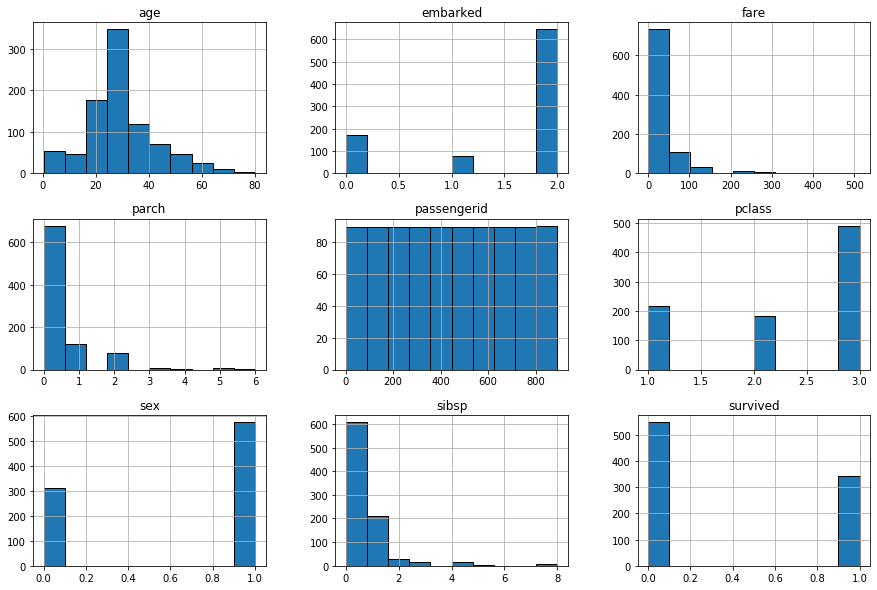

In [133]:
titanic.hist(figsize=(15,10),edgecolor="black")
plt.show()

# PairPlot

c:\users\tushar singh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\tushar singh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


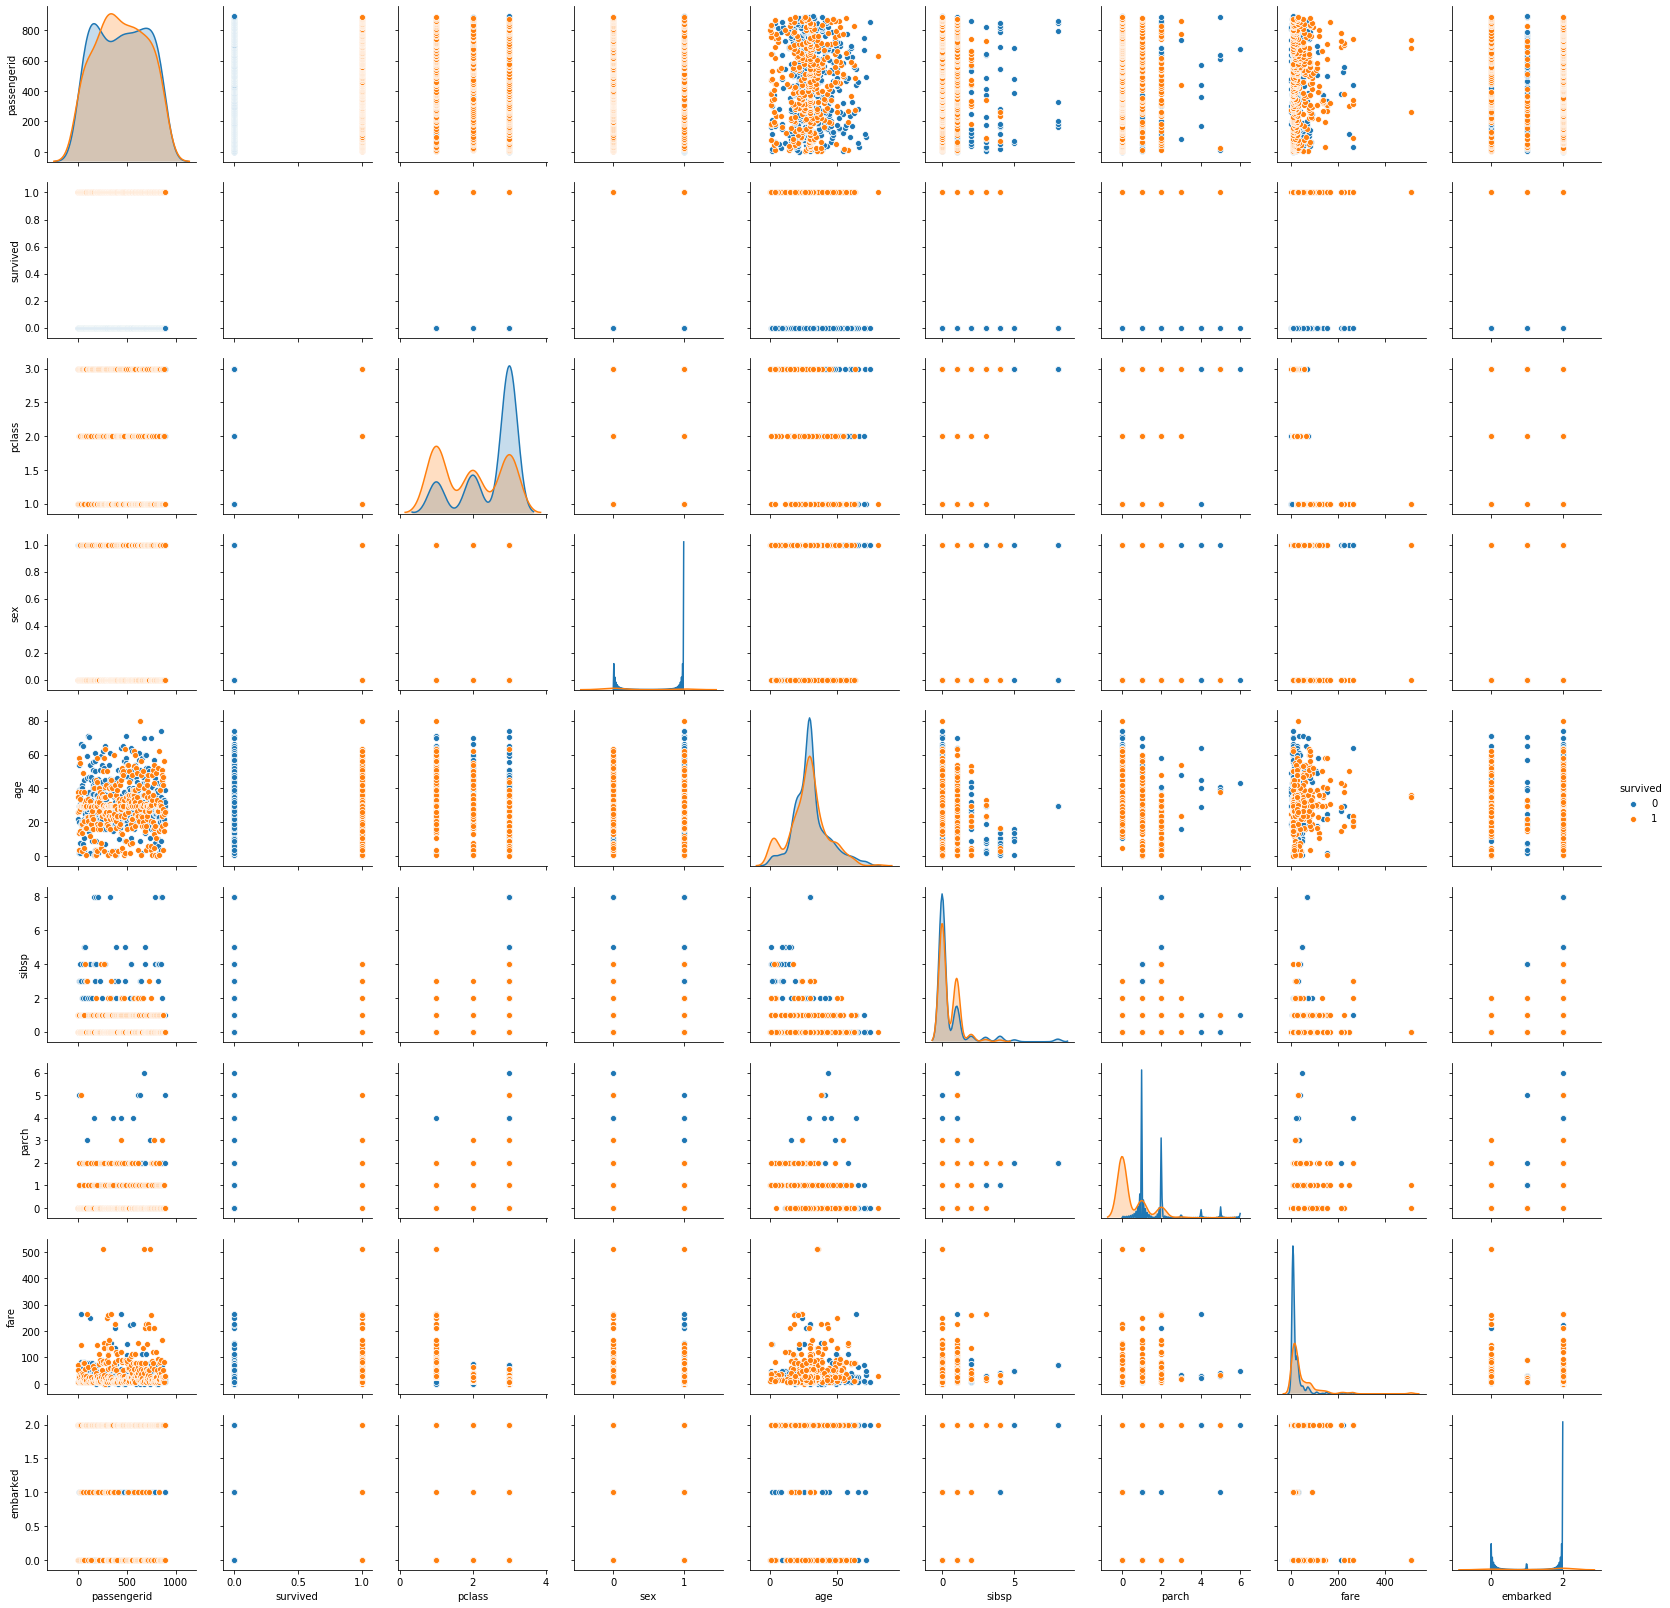

In [134]:
sns.pairplot(titanic,hue="survived")
plt.show()

# Countplot

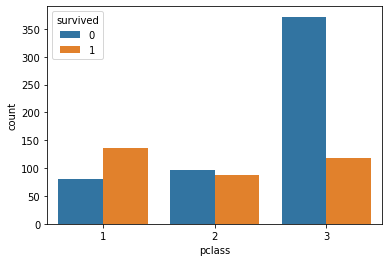

In [135]:
sns.countplot(x="pclass",hue="survived",data=titanic)
plt.show()

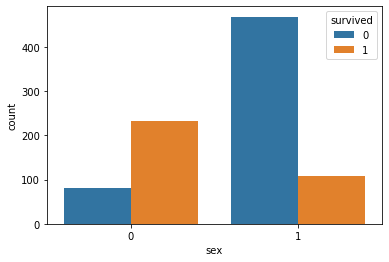

In [136]:
sns.countplot(x="sex",hue="survived",data=titanic)
plt.show()

# Barplot

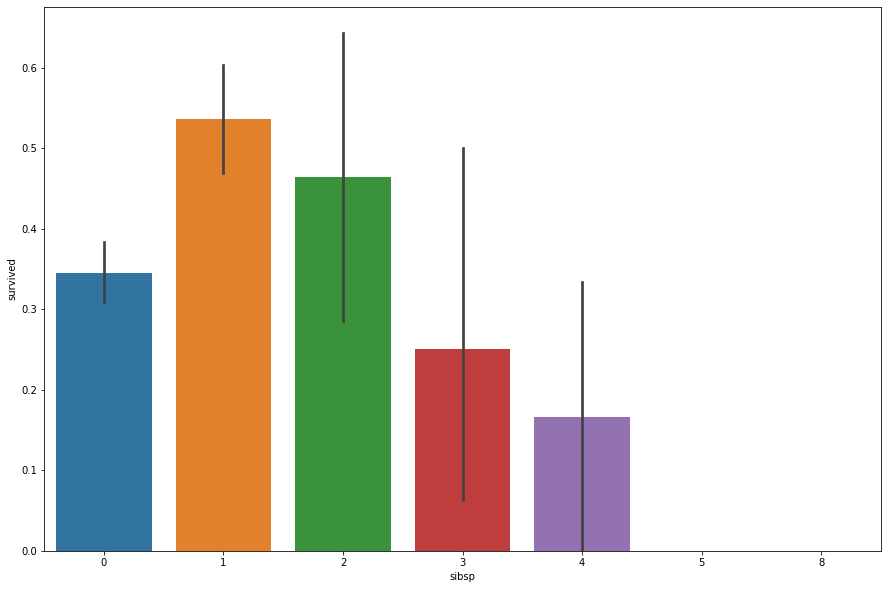

In [138]:
fig=plt.figure(figsize=(15,10))
sns.barplot(x="sibsp",y="survived",data=titanic)
plt.show()

# Scatterplot

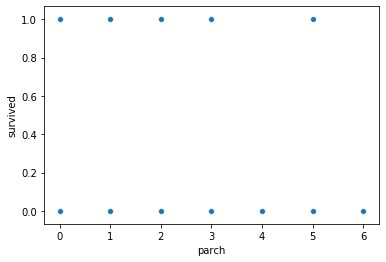

In [139]:
sns.scatterplot(x="parch",y="survived",data=titanic)
plt.show()

# HeatMap And Cor-relation

In [140]:
titanic_corr=titanic.corr()

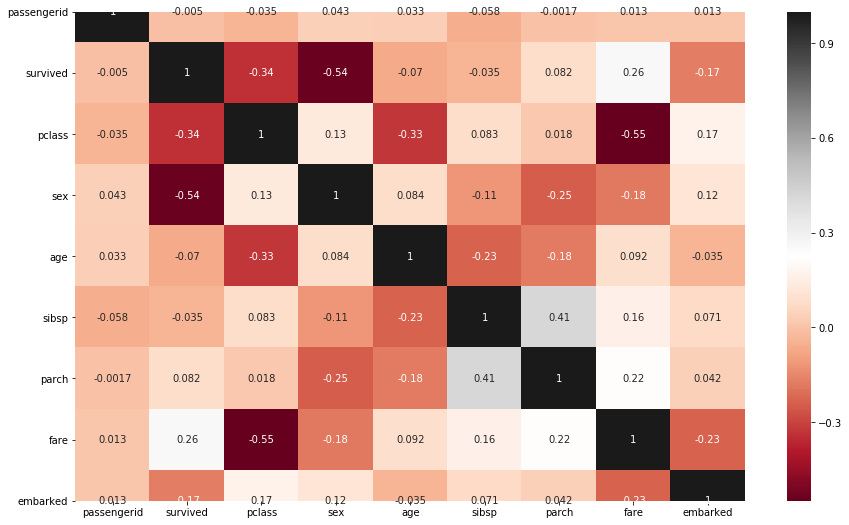

In [141]:
fig=plt.figure(figsize=(15,9))
sns.heatmap(titanic_corr,annot=True,cmap="RdGy")
plt.show()

# Pre-Processing

In [142]:
titanic.drop("name",axis=1,inplace=True)

In [143]:
titanic.drop("ticket",axis=1,inplace=True)

# MODEL BUILDING

In [54]:
y=titanic["survived"]
x=titanic.drop("survived",axis=1)

# Before building the model we have to divide the data into train test

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.12,random_state=32)

# Before moving ahead lets check the shape of test data

In [58]:
x_test

,passengerid,pclass,sex,age,sibsp,parch,fare,embarked
837,838,3,1,29.699118,0,0,8.0500,2
334,335,1,0,29.699118,1,0,133.6500,2
849,850,1,0,29.699118,1,0,89.1042,0
778,779,3,1,29.699118,0,0,7.7375,1
413,414,2,1,29.699118,0,0,0.0000,2
...,...,...,...,...,...,...,...,...
572,573,1,1,36.000000,0,0,26.3875,2
348,349,3,1,3.000000,1,1,15.9000,2
307,308,1,0,17.000000,1,0,108.9000,0
39,40,3,0,14.000000,1,0,11.2417,0


In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(784, 8)
(107, 8)
(784,)
(107,)


# DecisionTreeClassifier

In [60]:
titanicdatset=DecisionTreeClassifier()
titanicdatset=DecisionTreeClassifier(criterion="gini",splitter="best")
titanicdatset.fit(x_train,y_train)
prediction=titanicdatset.predict(x_test)

# Comparing Actual Value VS Predicted Value

In [62]:
output=pd.DataFrame({"Actual":y_test,"predicted":prediction})
print(output)

     Actual  predicted
837       0          0
334       1          1
849       1          1
778       0          0
413       0          0
..      ...        ...
572       1          1
348       1          1
307       1          1
39        1          0
311       1          1

[107 rows x 2 columns]


# Checking Accuarcy Of The Model

In [64]:
print("accuracy of the model:",accuracy_score(y_test,prediction))

accuracy of the model: 0.7850467289719626


# RandomforestClassifier


In [65]:
rf=RandomForestClassifier()
rf=RandomForestClassifier(criterion="gini",warm_start="False")
rf.fit(x_train,y_train)
predicti=rf.predict(x_test)

c:\users\tushar singh\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Comparing Actual Value VS Predicted Value

In [66]:
outputrf=pd.DataFrame({"Actual":y_test,"predicted":predicti})
print(outputrf)

     Actual  predicted
837       0          0
334       1          1
849       1          1
778       0          0
413       0          0
..      ...        ...
572       1          1
348       1          1
307       1          1
39        1          0
311       1          1

[107 rows x 2 columns]


# Accuracy Of The Model

In [67]:
print("accuracy of the model:",accuracy_score(y_test,predicti))

accuracy of the model: 0.8785046728971962


# We Have use many Model But Random Forest Classifier gives the  best Accuracy 0.8785 means87.85%